g2 for total intensity

In [1]:
%matplotlib inline
import numpy as np
import numpy.ma as ma
import pandas as pd
import matplotlib.pyplot as plt
import skbeam.core.roi as roi
import skbeam.core.correlation as corr
import skbeam.core.utils as utils
import xray_vision
import xray_vision.mpl_plotting as mpl_plot
import time

from databroker import DataBroker as db, get_table
from csxtools.utils import get_fastccd_images, get_images_to_3D, get_images_to_4D, fccd_mask, get_fastccd_flatfield
from csxtools.image import stackmean, images_mean, images_sum
from csxtools.ipynb import image_stack_to_movie, show_image_stack
from matplotlib.colors import LogNorm
from skbeam.core import recip
from skbeam.core. utils import grid3d
from scipy.signal import savgol_filter as sgf
from matplotlib import colors
from ipywidgets import interact


In [10]:
#634 ev, 80 K

light = db[123150]
dark0 = db[123147]
dark1 = db[123148]
dark2 = db[123149]


images = get_fastccd_images(light, (dark0, dark1, dark2), flat=None)
stack = get_images_to_3D(images)
mean_stack = stackmean(stack)



/opt/conda_envs/analysis-2018-2.1/lib/python3.6/site-packages/csxtools/utils.py:181: UserWarning: Images and get_images are deprecated. Use Header.data('fccd_image') instead.
  images = header.db.get_images(header, tag)


In [ ]:
#[np.sum(stack[i,:,:]) for i in range(0,3600)]

In [11]:
total_in=[]
for i in range(0, 3600):
    I=stack[i,:,:]
    j=np.sum(I)
    total_in.append(j)
print(total_in)

[992202000.0, 937498240.0, 808605060.0, 698759200.0, 535903400.0, 382793020.0, 280850370.0, 210105940.0, 158916800.0, 124665290.0, 100833464.0, 85067350.0, 77157020.0, 69441960.0, 62141290.0, 60969172.0, 58610830.0, 55593110.0, 51235730.0, 52152868.0, 48047784.0, 45623864.0, 44956956.0, 45652830.0, 45515916.0, 45150960.0, 45925428.0, 47175490.0, 46865960.0, 46205810.0, 45505656.0, 47050320.0, 44567844.0, 46851384.0, 44945840.0, 45243956.0, 42630040.0, 43418616.0, 46772300.0, 46259536.0, 48447876.0, 47080876.0, 48075120.0, 46320196.0, 47166210.0, 44878664.0, 47505788.0, 47044256.0, 46939216.0, 43105600.0, 40909964.0, 43481316.0, 47080132.0, 47463068.0, 43508900.0, 44998736.0, 45684450.0, 44443944.0, 42597170.0, 44064548.0, 45389944.0, 45688380.0, 45961760.0, 47581716.0, 43534236.0, 44705970.0, 49075468.0, 44911084.0, 48631324.0, 47738350.0, 44576256.0, 45582776.0, 45835296.0, 44949068.0, 48093380.0, 48521880.0, 45737730.0, 44995460.0, 47993780.0, 46096470.0, 44459620.0, 45889120.0, 4727

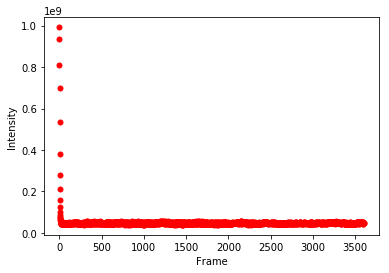

In [12]:
x=range(0,3600)
y=total_in
fig, ax =plt.subplots()
ax.plot(x,y,'o', markersize=5, color='r' )
ax.set(ylabel='Intensity', xlabel='Frame');

In [5]:
stack.shape

(3600, 960, 1000)

In [6]:
mean_stack.shape

(960, 1000)

In [7]:
#making all levels int 1
#label = np.ones((960,1050))
#np.trunc(label)
#label=label.astype(int)
#print(label)


In [8]:
stack1=np.ones((3600,960,1050))
for i in range(3600):
    stack1[i]=stack1[i]*total_in[i]

In [9]:
#making a ring for specific q
roi_edge = (710,730)
label_array = roi.rings(roi_edge, (450, 1050), shape=mean_stack.shape)


In [10]:
[num_levels, num_bufs] = [6, 12]

g2, lag_steps = corr.multi_tau_auto_corr(num_levels, num_bufs, label_array, stack1)


In [11]:
lag_steps

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        14,  16,  18,  20,  22,  24,  28,  32,  36,  40,  44,  48,  56,
        64,  72,  80,  88,  96, 112, 128, 144, 160, 176, 192, 224, 256,
       288, 320, 352])

In [12]:
g2[:]

array([[1.17022267],
       [1.1696088 ],
       [1.16877587],
       [1.16824417],
       [1.16813456],
       [1.16804982],
       [1.16760469],
       [1.16683362],
       [1.16597999],
       [1.16522224],
       [1.16457072],
       [1.16389612],
       [1.16311854],
       [1.16150467],
       [1.15990064],
       [1.15827594],
       [1.15673394],
       [1.15514445],
       [1.15359194],
       [1.15053457],
       [1.14755415],
       [1.14471561],
       [1.14200105],
       [1.13928817],
       [1.13658   ],
       [1.13115615],
       [1.12590149],
       [1.12074842],
       [1.11536968],
       [1.10968718],
       [1.103714  ],
       [1.09130244],
       [1.07859144],
       [1.06511   ],
       [1.05290014],
       [1.04276543],
       [1.03450116],
       [1.0185358 ],
       [1.00537342],
       [0.99544967],
       [0.98756374],
       [0.98076366]])

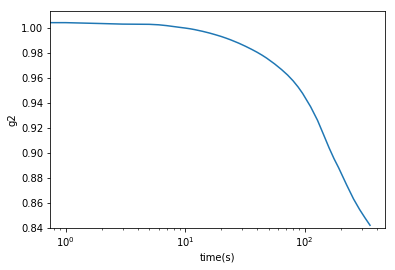

In [17]:
% matplotlib inline
ax=plt.semilogx(lag_steps * 1 ,g2/g2[10]) 
plt.ylabel('g2')
plt.xlabel('time(s)')
plt.ylim(0.840, 1.014);